In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import seaborn as sns

sns.set()

# Sources

Freely adapted from [this example](https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#sphx-glr-auto-examples-svm-plot-oneclass-py). For more information on OneClassSVM check [this](https://scikit-learn.org/stable/modules/svm.html#svm-outlier-detection) and [this](https://scikit-learn.org/stable/modules/outlier_detection.html).

# Prelude

Some examples with less know functions used, which will help us understand this notebook

**np.r_**

In [2]:
np.r_[np.array([[11,22,33],[44,55,66]]), np.array([[1,2,3],[4,5,6]])]

array([[11, 22, 33],
       [44, 55, 66],
       [ 1,  2,  3],
       [ 4,  5,  6]])

**np.c_** - Acts like a zip function, but with list instead of tuples

In [3]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]


array([[1, 4],
       [2, 5],
       [3, 6]])

# Generating Data

In [4]:
# Train Data

# the higher the std_dev, the more difficult will be to differentiate regulars and outliers
# a std dev = 1, and this dataset will be impossible to distinguish
std_dev=0.5 

# drawing 100x2 data points from a normal N(0,1) * std_dev
X = std_dev * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2, X+[-2,2], X+[2,-2]]

In [5]:
# Test Data

# Regular New observations
X = std_dev * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2, X+[-2,2], X+[2,-2]]

# Outlier observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# The Model

In [6]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.4)
clf.fit(X_train);

In [7]:
# Classify features

y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

y_pred_outliers = clf.predict(X_outliers)

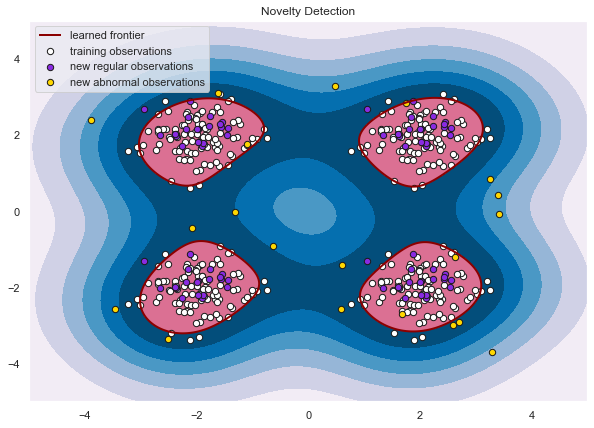

In [17]:
#n_error_train = y_pred_train[y_pred_train == -1].size
#n_error_test = y_pred_test[y_pred_test == -1].size
#n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# the classifier's learned frontiers
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,7))

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
#plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.title("Novelty Detection")
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc = "upper left",
    prop = matplotlib.font_manager.FontProperties(size=11),
)

plt.show()

# Misidentified labels

In [9]:
# label -1 is for outlier, and 1 for regular.

# number of regular obs, in train set, labeled as novelties
n_error_train = y_pred_train[y_pred_train == -1].size

n_train=y_pred_train.size

# number of regular obs, in test set, labeled as novelties
n_error_test = y_pred_test[y_pred_test == -1].size

n_test=y_pred_test.size

# number of outlier/novelties obs, in the test set, labeled as regular
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

n_novel=y_pred_outliers.size

In [10]:
print("""Proportion of misidentified labels

      In Training Set: %.4f
      
      In Regular Test Set: %.4f
      
      In Novelties Set: %.4f"""
    % (n_error_train/n_train, n_error_test/n_test, n_error_outliers/n_novel))

Proportion of misidentified labels

      In Training Set: 0.0950
      
      In Regular Test Set: 0.0500
      
      In Novelties Set: 0.1500
